In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


Data loading and preprocessing

In [35]:
Toulouse_Apple=pd.read_csv("Toulouse_Apple_Web_Services.csv")
Toulouse_Apple[:3]

,Date,tile_id,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,20190316,109,114,56,83,90,116,18,28,20,...,1281,1982,3051,1221,2398,5650,933,2797,11455,1290
1,20190316,455,116,69,96,86,118,28,59,22,...,1780,1959,3039,1795,2500,4745,1274,2938,8884,1771
2,20190316,456,106,55,76,83,104,23,32,16,...,1212,1817,2812,1261,2290,5078,906,2547,10160,1269


In [36]:
Dijon_Apple=pd.read_csv("Dijon_Apple_Web_Services.csv")
Dijon_Apple[:3]

,Date,tile_id,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,20190316,605,18,19,37,30,8,22,48,9,...,398,244,348,502,390,338,317,581,389,308
1,20190316,630,13,22,17,18,7,29,12,9,...,358,242,256,285,296,328,338,565,366,236
2,20190316,839,19,20,49,30,9,22,45,10,...,419,269,382,514,410,351,320,587,394,321


In [4]:
def get_30_min(df):

    df_data = df.iloc[:, 2:]
    num_columns = len(df_data.columns)
    averages_df = pd.DataFrame()


    for i in range(0, num_columns, 2):
        combined_columns = df_data.iloc[:, i:i+2]
        combined_average = combined_columns.mean(axis=1)

        hour = i // 4
        minute = '00' if (i // 2) % 2 == 0 else '30'
        averages_df[f'{hour:02d}:{minute}'] = combined_average

    averages_df.insert(0, df.columns[1], df[df.columns[1]])
    averages_df.insert(0, df.columns[0], df[df.columns[0]])

    return averages_df

In [5]:
def extreme_outliers_handling(df):

    lower_percentiles = df.select_dtypes(include=['int', 'float']).quantile(q=5/ 100)
    
    upper_percentiles = df.select_dtypes(include=['int', 'float']).quantile(q=99/ 100)
    for column in lower_percentiles.index:
        lower_limit = lower_percentiles[column]
        upper_limit = upper_percentiles[column]
        df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
        df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

In [6]:
def boxplot_fun(df,title):
    plt.figure(figsize=(30, 10))
    df.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [37]:
Toulouse_Apple=get_30_min(Toulouse_Apple)
Dijon_Apple=get_30_min(Dijon_Apple)

In [8]:
Toulouse_Apple[:3]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,20190316,109,85.0,86.5,67.0,24.0,78.0,18.5,10.5,3.5,...,497.0,391.5,1399.5,1001.0,1754.5,1631.5,2136.0,4024.0,1865.0,6372.5
1,20190316,455,92.5,91.0,73.0,40.5,80.5,21.5,16.5,3.5,...,488.0,459.5,1523.5,1153.0,1669.0,1869.5,2417.0,3622.5,2106.0,5327.5
2,20190316,456,80.5,79.5,63.5,24.0,59.5,17.0,10.5,3.5,...,450.0,381.5,1283.0,954.5,1595.5,1514.5,2036.5,3684.0,1726.5,5714.5


In [9]:
Dijon_Apple[:3]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,20190316,605,18.5,33.5,15.0,28.5,11.5,23.0,8.0,4.5,...,68.5,158.0,217.5,224.0,197.0,321.0,425.0,364.0,449.0,348.5
1,20190316,630,17.5,17.5,18.0,10.5,30.0,19.0,5.0,7.5,...,53.5,269.5,186.5,174.5,151.5,300.0,270.5,312.0,451.5,301.0
2,20190316,839,19.5,39.5,15.5,27.5,12.0,21.5,8.0,4.5,...,74.5,163.5,228.5,233.0,211.0,344.0,448.0,380.5,453.5,357.5


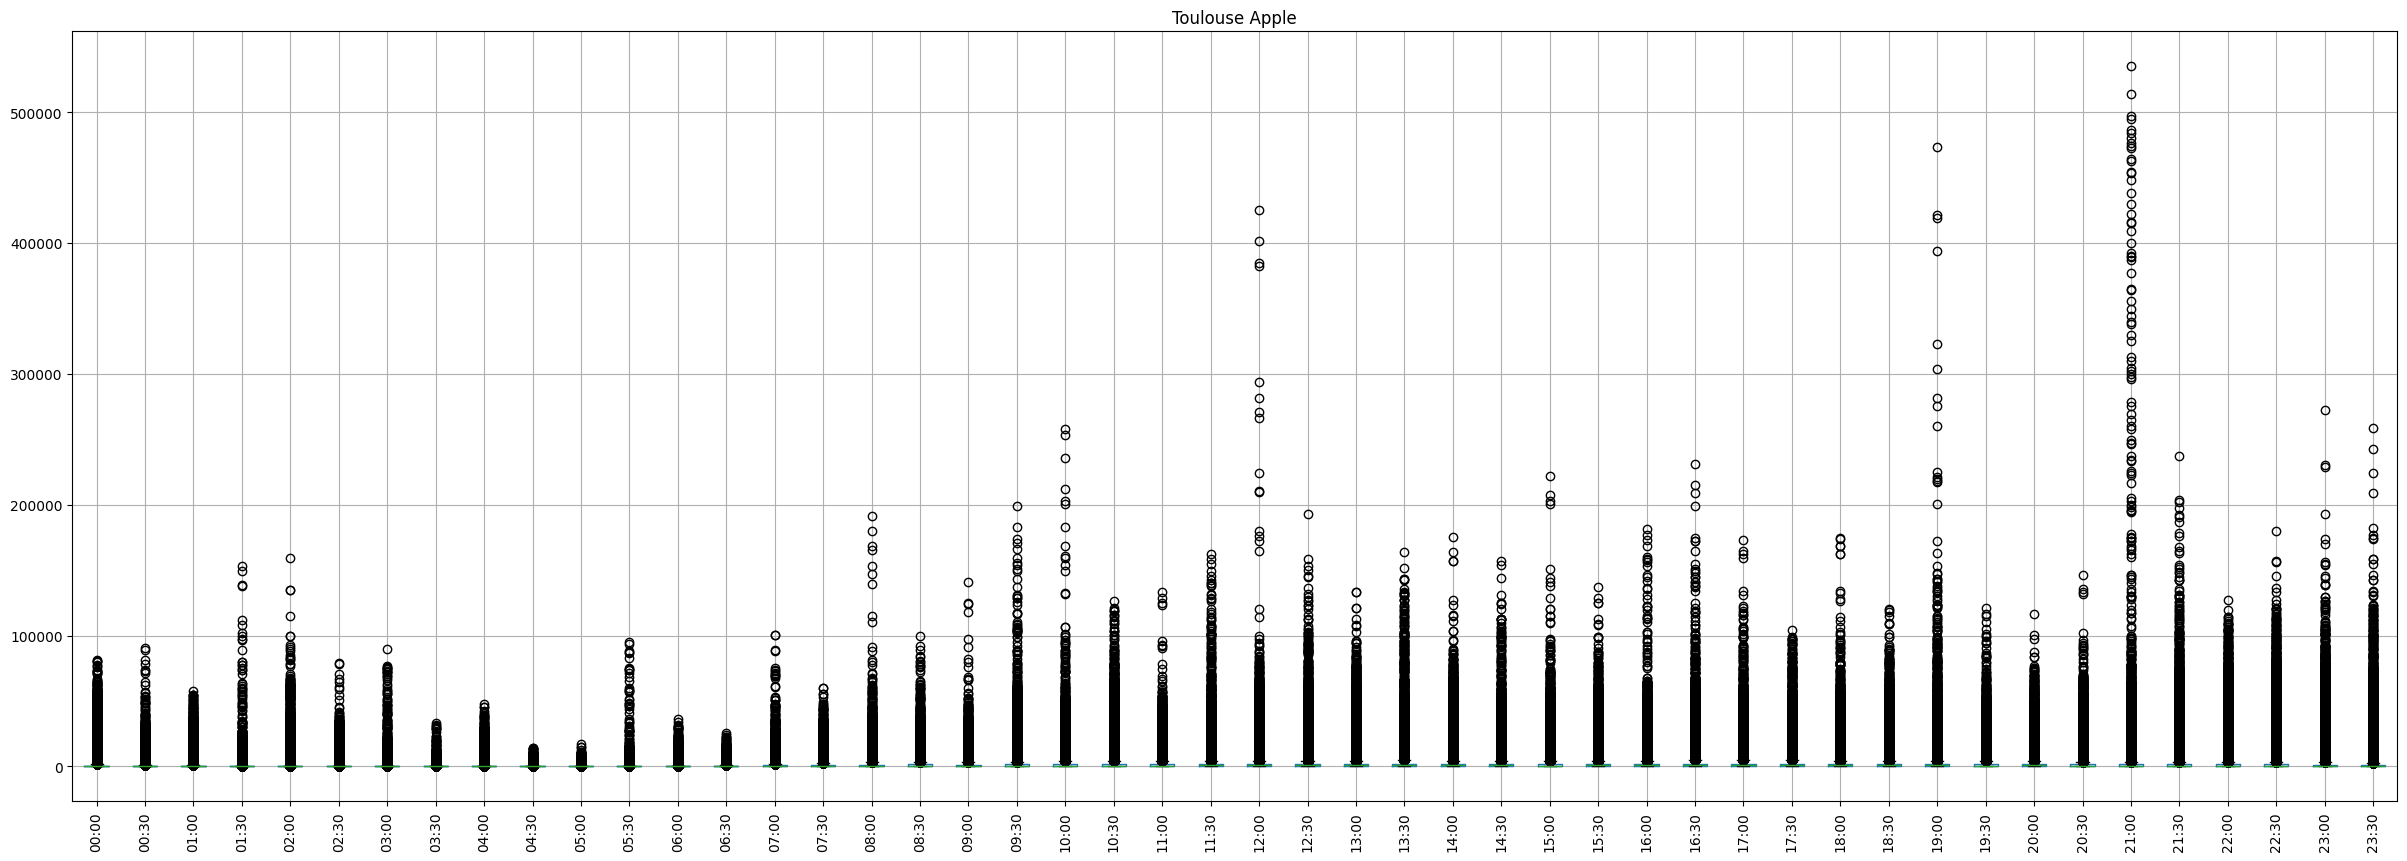

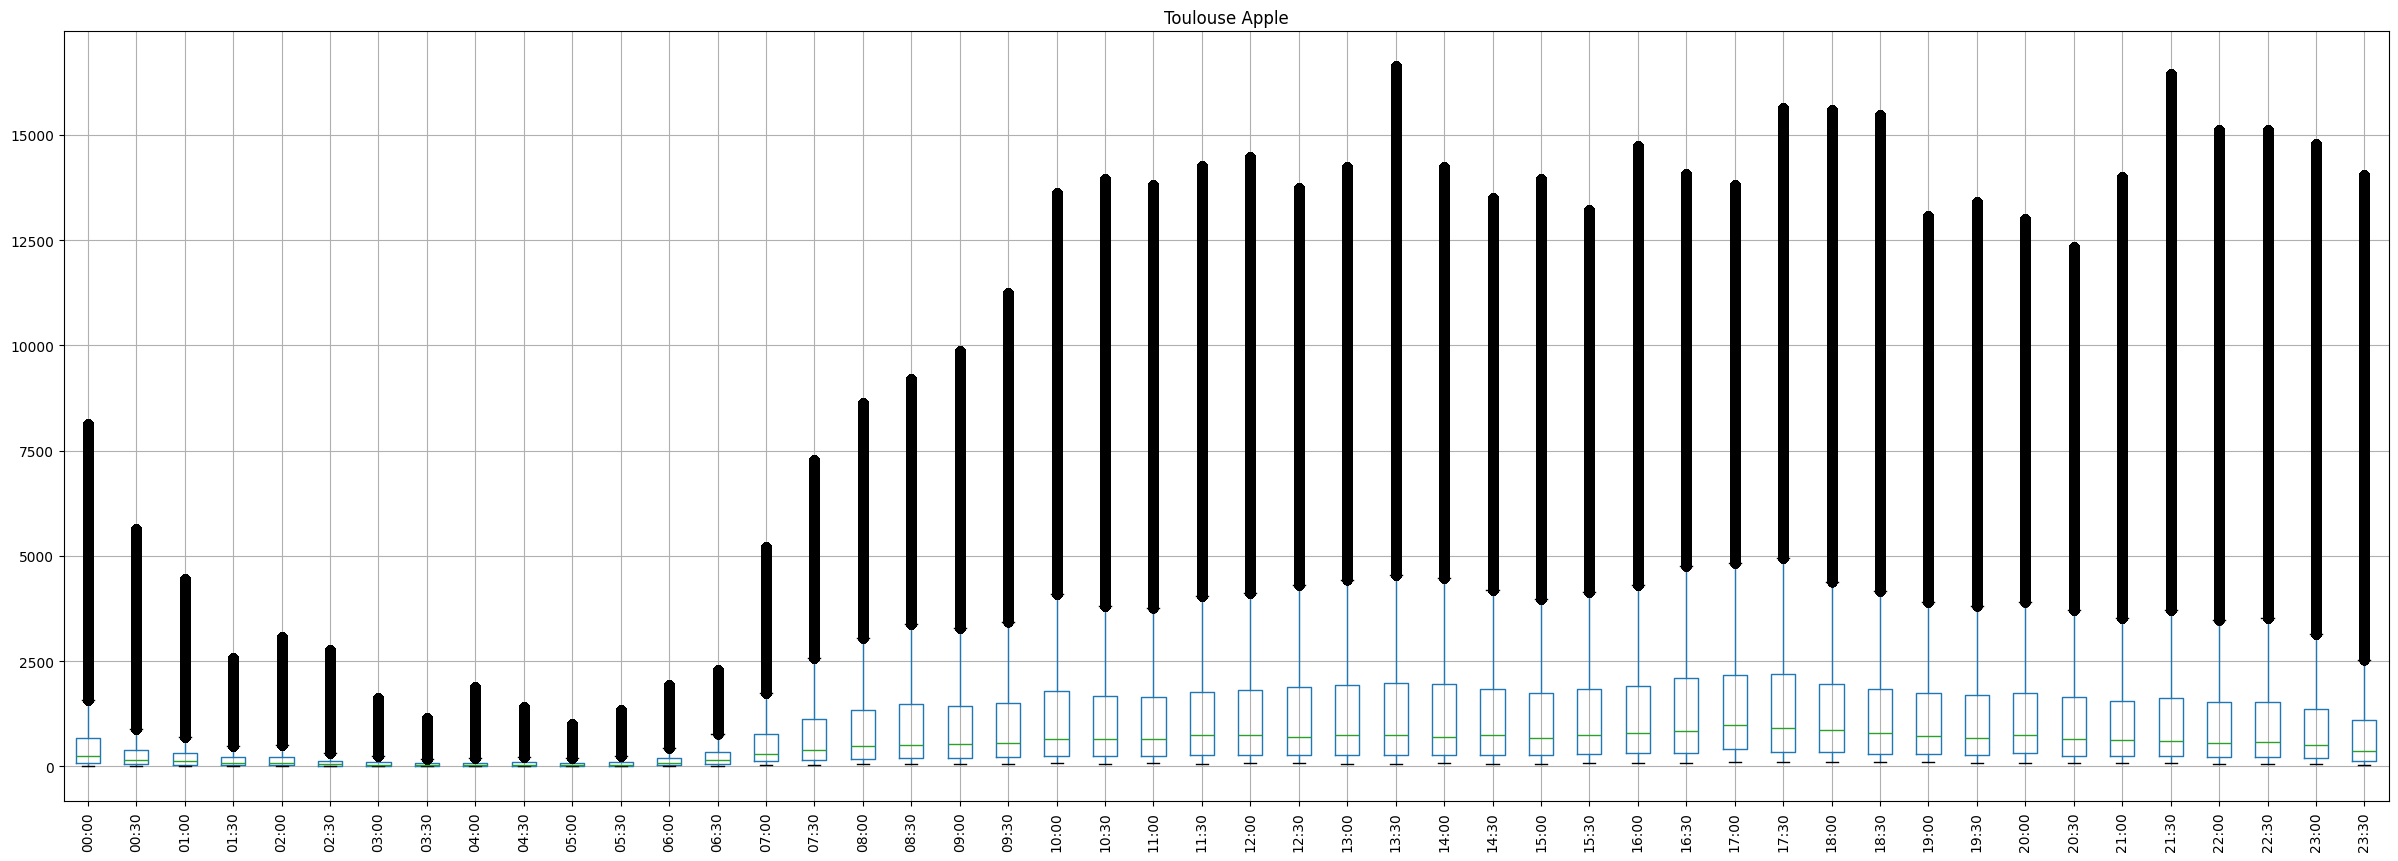

In [10]:
boxplot_fun(Toulouse_Apple.iloc[:,2:],"Toulouse Apple")
Toulouse_Apple=extreme_outliers_handling(Toulouse_Apple)
boxplot_fun(Toulouse_Apple.iloc[:,2:],"Toulouse Apple")

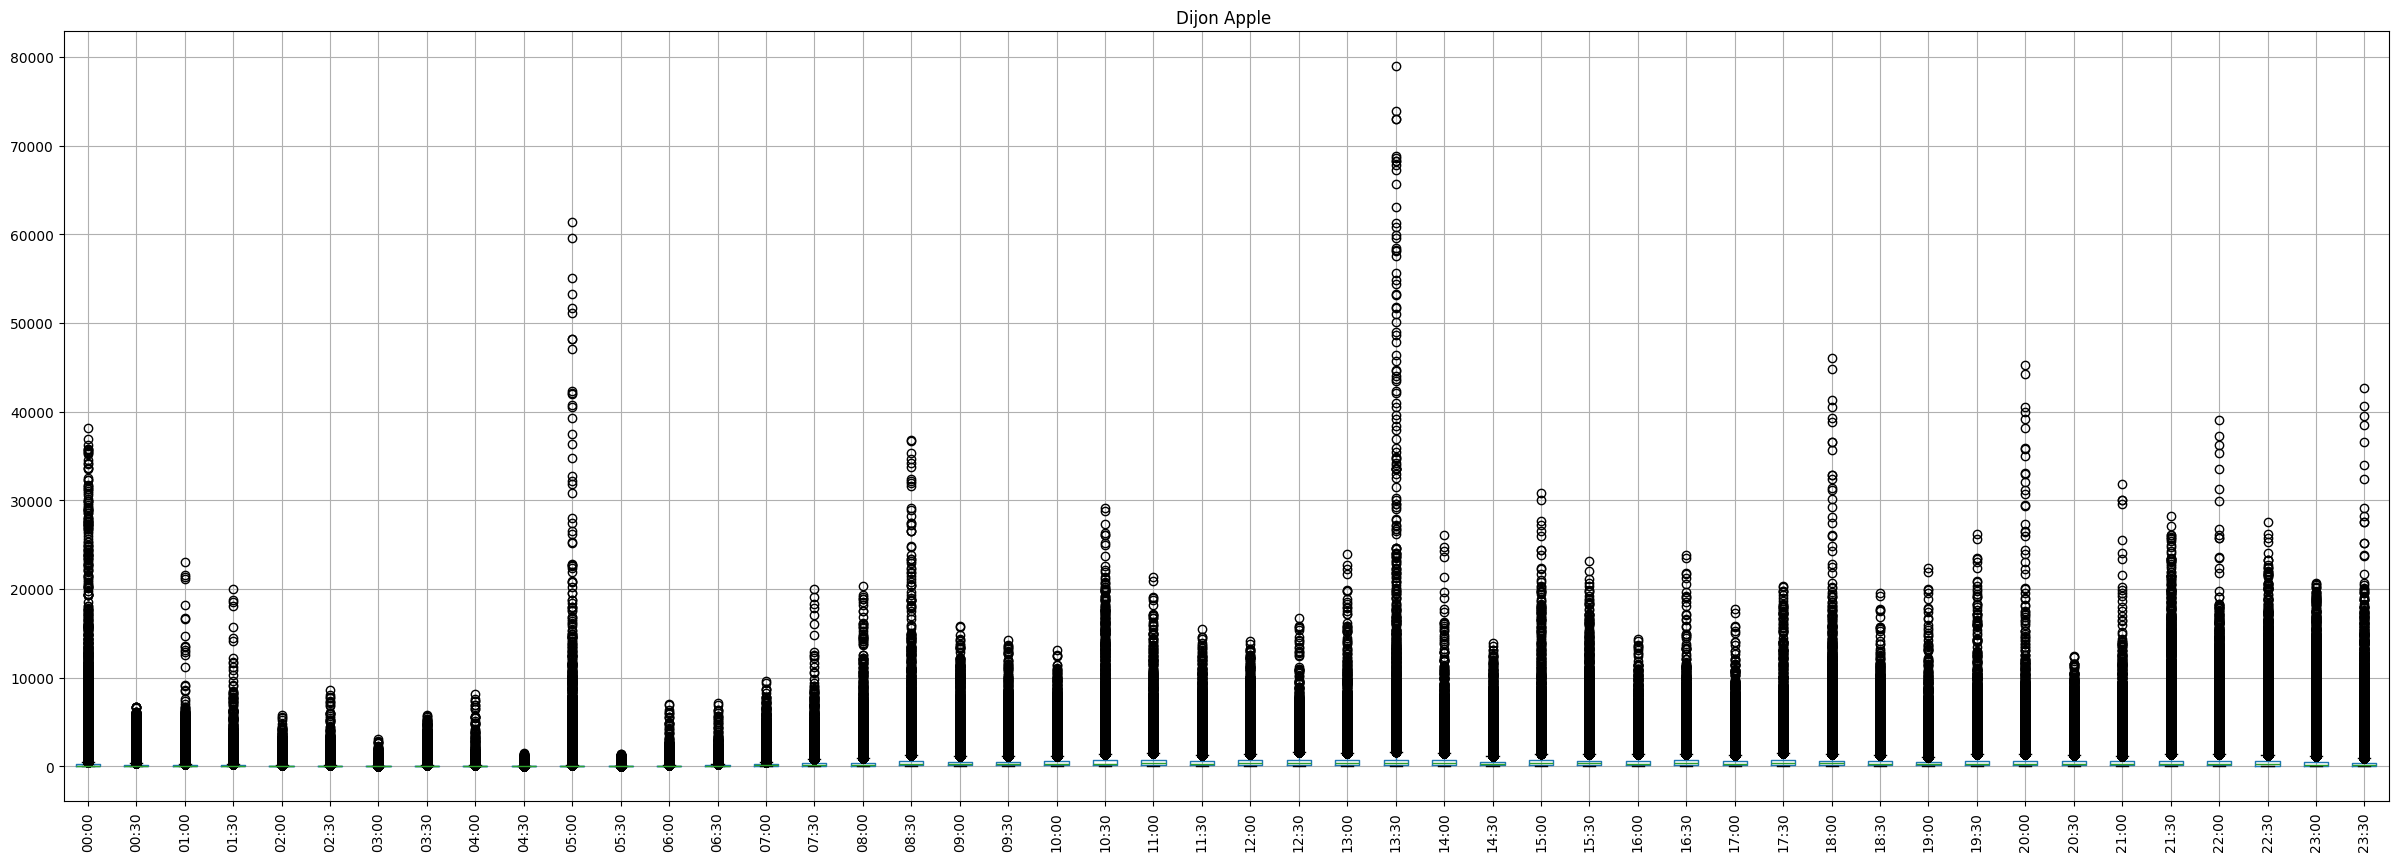

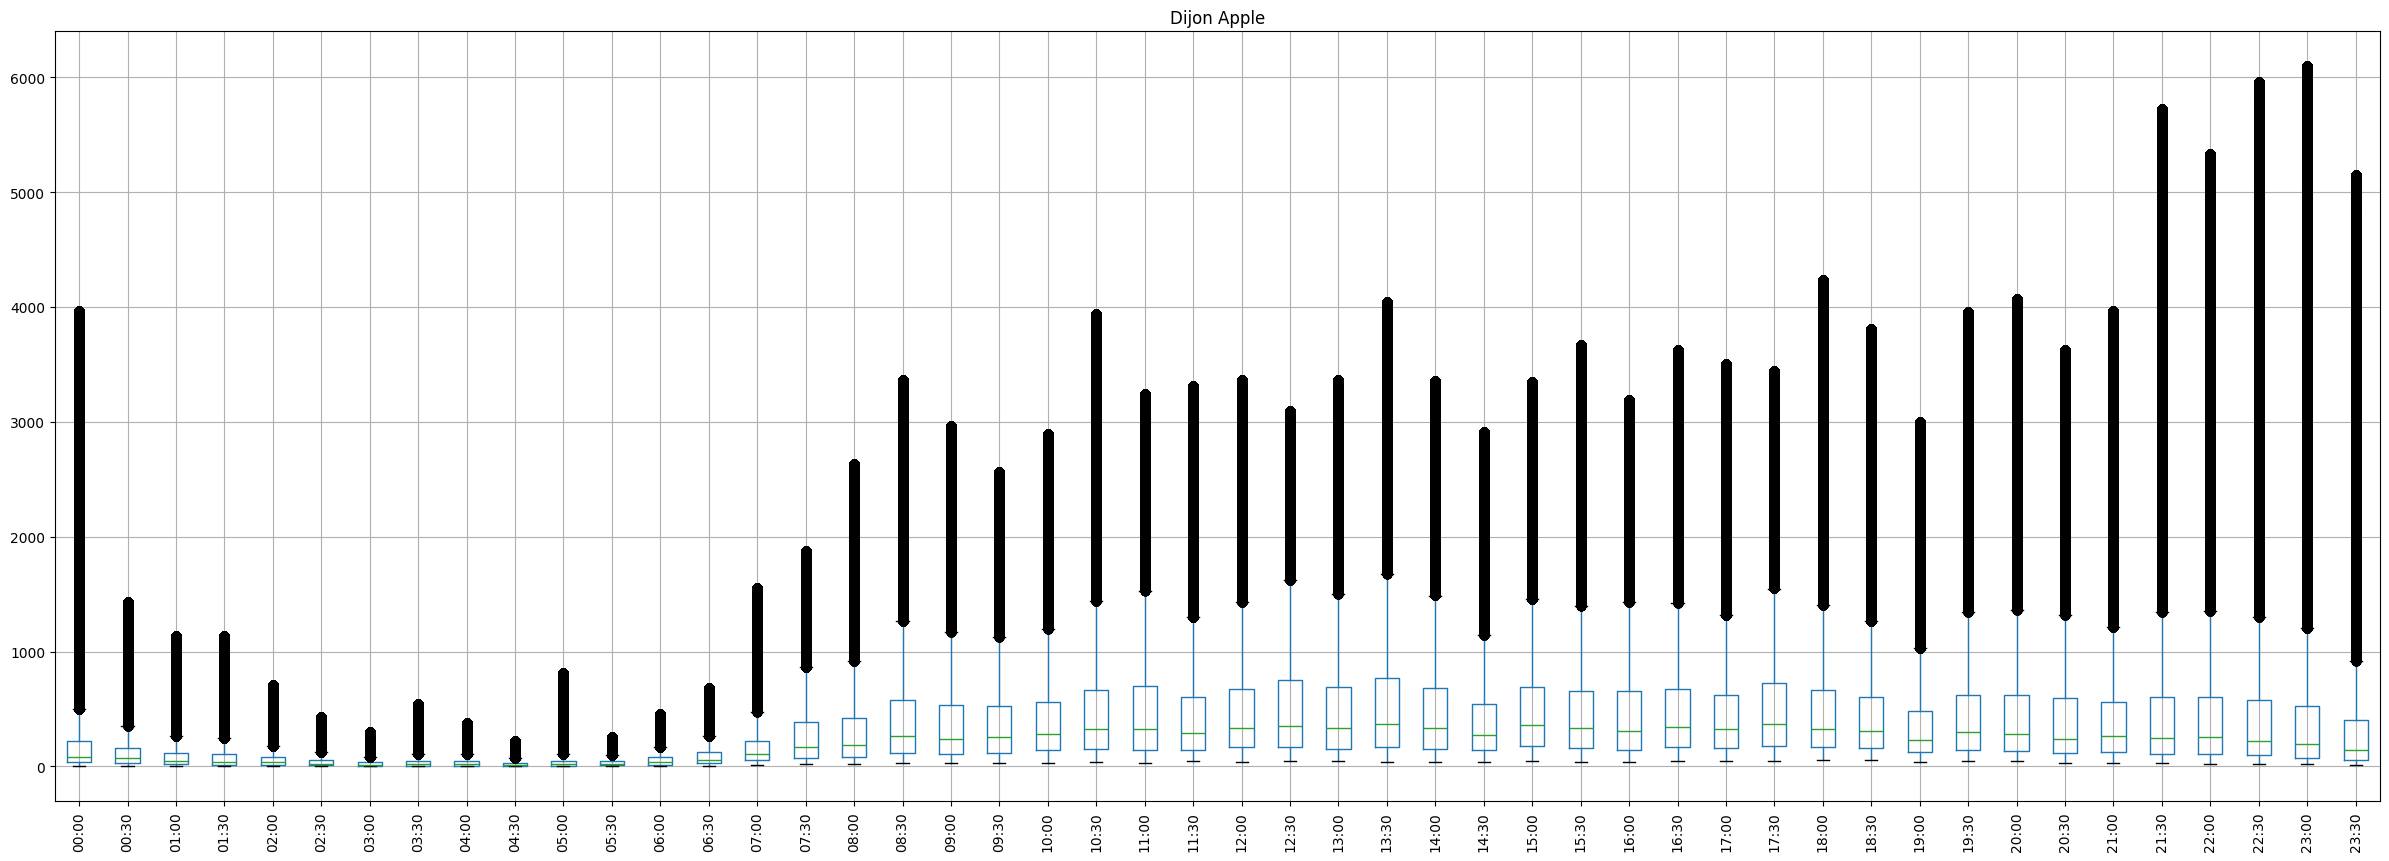

In [11]:
boxplot_fun(Dijon_Apple.iloc[:,2:],"Dijon Apple ")
Dijon_Apple=extreme_outliers_handling(Dijon_Apple)
boxplot_fun(Dijon_Apple.iloc[:,2:],"Dijon Apple")

In [12]:
Toulouse_Apple.isna().sum()

Date       0
tile_id    0
00:00      0
00:30      0
01:00      0
01:30      0
02:00      0
02:30      0
03:00      0
03:30      0
04:00      0
04:30      0
05:00      0
05:30      0
06:00      0
06:30      0
07:00      0
07:30      0
08:00      0
08:30      0
09:00      0
09:30      0
10:00      0
10:30      0
11:00      0
11:30      0
12:00      0
12:30      0
13:00      0
13:30      0
14:00      0
14:30      0
15:00      0
15:30      0
16:00      0
16:30      0
17:00      0
17:30      0
18:00      0
18:30      0
19:00      0
19:30      0
20:00      0
20:30      0
21:00      0
21:30      0
22:00      0
22:30      0
23:00      0
23:30      0
dtype: int64

In [13]:
Dijon_Apple.isna().sum()

Date       0
tile_id    0
00:00      0
00:30      0
01:00      0
01:30      0
02:00      0
02:30      0
03:00      0
03:30      0
04:00      0
04:30      0
05:00      0
05:30      0
06:00      0
06:30      0
07:00      0
07:30      0
08:00      0
08:30      0
09:00      0
09:30      0
10:00      0
10:30      0
11:00      0
11:30      0
12:00      0
12:30      0
13:00      0
13:30      0
14:00      0
14:30      0
15:00      0
15:30      0
16:00      0
16:30      0
17:00      0
17:30      0
18:00      0
18:30      0
19:00      0
19:30      0
20:00      0
20:30      0
21:00      0
21:30      0
22:00      0
22:30      0
23:00      0
23:30      0
dtype: int64

In [45]:
Toulouse_Apple['Total usages'] = Toulouse_Apple.iloc[:,2:].sum(axis=1) 

Dijon_Apple['Total usages'] = Dijon_Apple.iloc[:,2:].sum(axis=1) 
Dijon_Apple[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,6217.0,18.5,33.5,15.0,28.5,11.5,23.0,8.0,4.5,...,158.0,217.5,224.0,197.0,321.0,425.0,364.0,449.0,348.5,5205.0
1,20190316.0,6217.0,17.5,17.5,18.0,10.5,30.0,19.0,5.0,7.5,...,269.5,186.5,174.5,151.5,300.0,270.5,312.0,451.5,301.0,4515.5


In [15]:
Toulouse_Apple[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,12757.0,85.0,86.5,67.0,24.0,78.0,18.5,10.5,3.5,...,391.5,1399.5,1001.0,1754.5,1631.5,2136.0,4024.0,1865.0,6372.5,33478.5
1,20190316.0,12757.0,92.5,91.0,73.0,40.5,80.5,21.5,16.5,3.5,...,459.5,1523.5,1153.0,1669.0,1869.5,2417.0,3622.5,2106.0,5327.5,32665.0


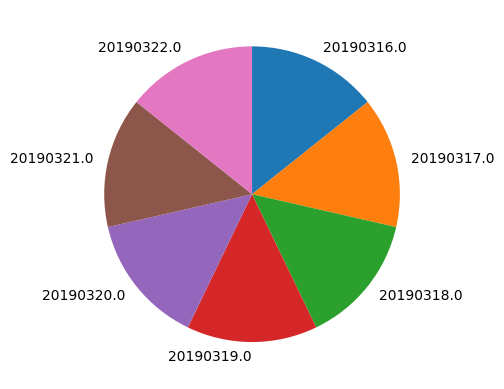

In [16]:
sorted_counts = Toulouse_Apple['Date'].value_counts()
gen_percentage = sorted_counts/sorted_counts.sum()
plt.pie(gen_percentage, labels = sorted_counts.index, startangle = 90, counterclock = False);

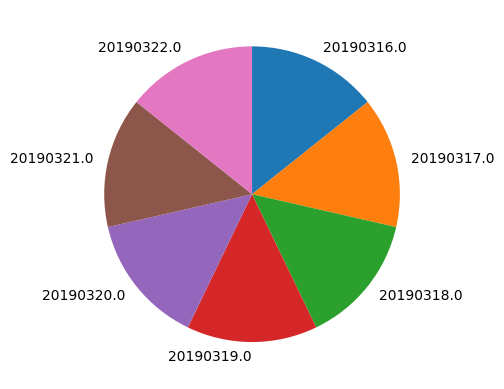

In [17]:
sorted_counts = Dijon_Apple['Date'].value_counts()
gen_percentage = sorted_counts/sorted_counts.sum()
plt.pie(gen_percentage, labels = sorted_counts.index, startangle = 90, counterclock = False);

In [18]:
def randomforestregression(df):
    
    rf = RandomForestRegressor(n_estimators=100, random_state=2454)
    x = df.iloc[:, 0:2]
    y = df['Total usages']
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2454)
    rf.fit(xtrain, ytrain)
    pred = rf.predict(xtest)
    mse = mean_squared_error(ytest, pred)
    mae = mean_absolute_error(ytest, pred)
    r2 = r2_score(ytest, pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")

    plt.figure(figsize=(14, 7))
    plt.scatter(ytest, pred, alpha=0.6, color='purple')
    plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')
    plt.xlabel('Actual Total Usages')
    plt.ylabel('Predicted Total Usages')
    plt.title('Actual vs Predicted Total Usages')
    plt.grid(True)
    plt.show()

    errors = ytest - pred
    error_df = pd.DataFrame({'Date': xtest['Date'], 'Error': errors})
    pivot_table = error_df.pivot_table(index='Date', columns=None, values='Error', aggfunc='mean')

    plt.figure(figsize=(14, 7))
    sns.heatmap(pivot_table, cmap='magma', annot=True)
    plt.title('Heatmap of Prediction Errors')
    plt.show()

Mean Squared Error: 283082779.39984006
Mean Absolute Error: 9532.249579336509
R2 Score: 0.9302885580365606


C:\Users\marya\AppData\Local\Temp\ipykernel_8460\210314665.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')


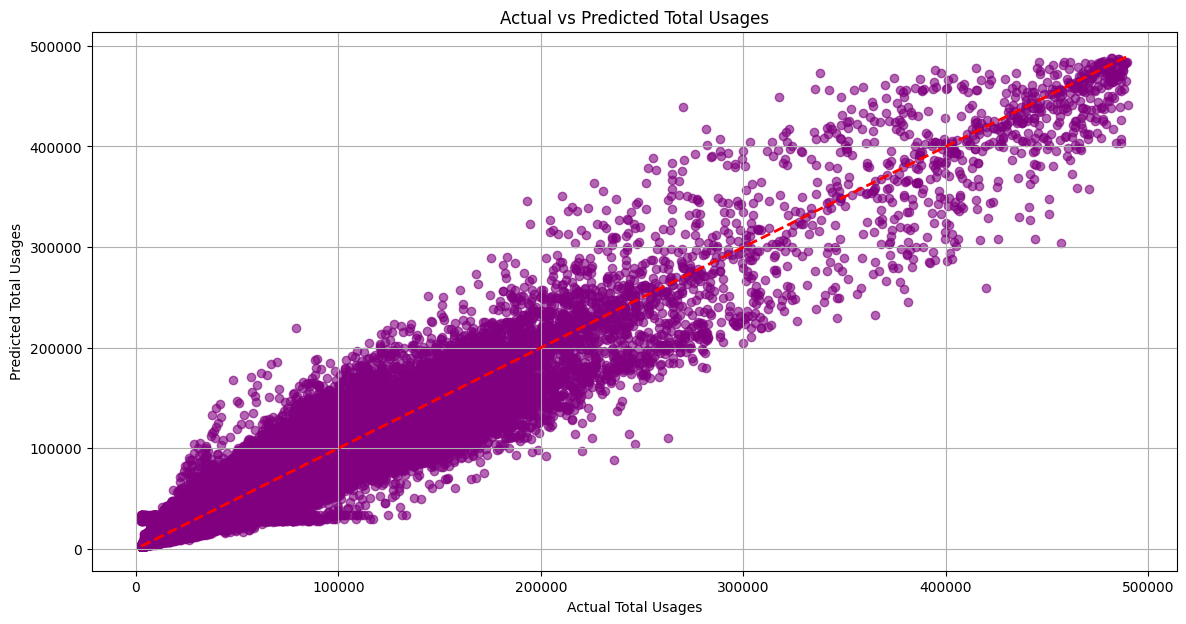

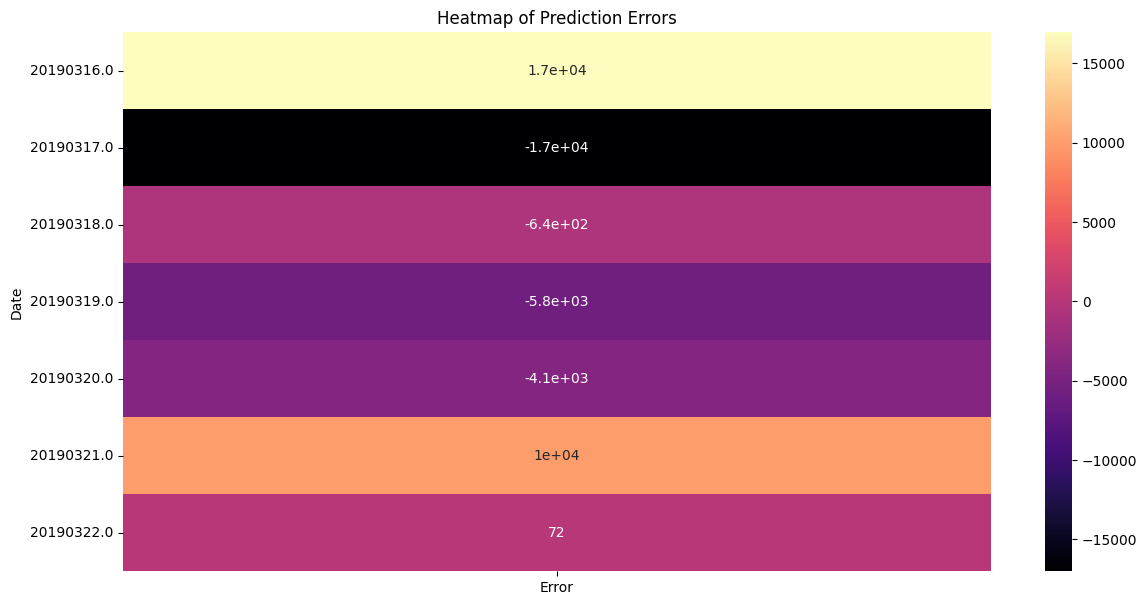

In [19]:
randomforestregression(Toulouse_Apple)

Mean Squared Error: 40118794.003899954
Mean Absolute Error: 3456.0282529432934
R2 Score: 0.8801597193783393


C:\Users\marya\AppData\Local\Temp\ipykernel_8460\210314665.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')


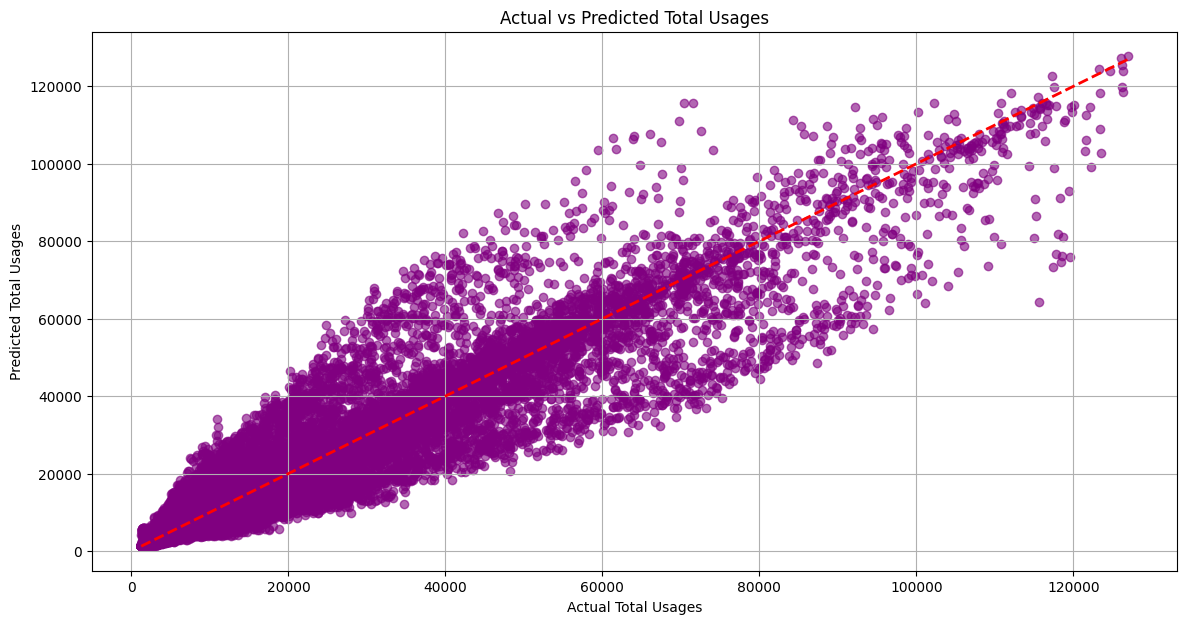

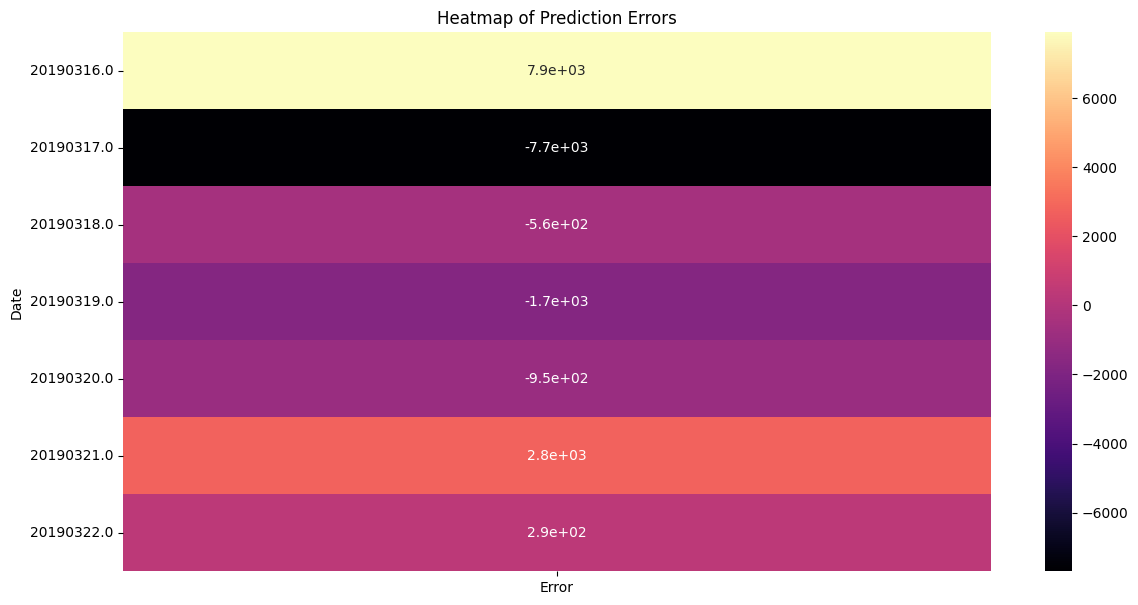

In [20]:
randomforestregression(Dijon_Apple)

In [29]:
def KNN(df):
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    df['Total usages'] =df.iloc[:,2:].sum(axis=1) 
    lr = KNeighborsRegressor()
    x = df.iloc[:, 2:12]
    y = df.iloc[:, 12:-1]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2454)
    

    lr.fit(xtrain, ytrain)
    pred = lr.predict(xtest)
    mse = mean_squared_error(ytest, pred)
    mae = mean_absolute_error(ytest, pred)
    r2 = r2_score(ytest, pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")
    y_test_flat = np.array(ytest).flatten()
    pred_flat = np.array(pred).flatten()
    results_df = pd.DataFrame({ 'Actual': y_test_flat, 'Predicted': pred_flat})

    plt.figure(figsize=(18, 6))
    sns.lineplot(x='Actual', y='Predicted', data=results_df)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values with Regression Line')
    plt.show()

Mean Squared Error: 14823.413150899318
Mean Absolute Error: 46.595910396939395
R2 Score: 0.955965453757451


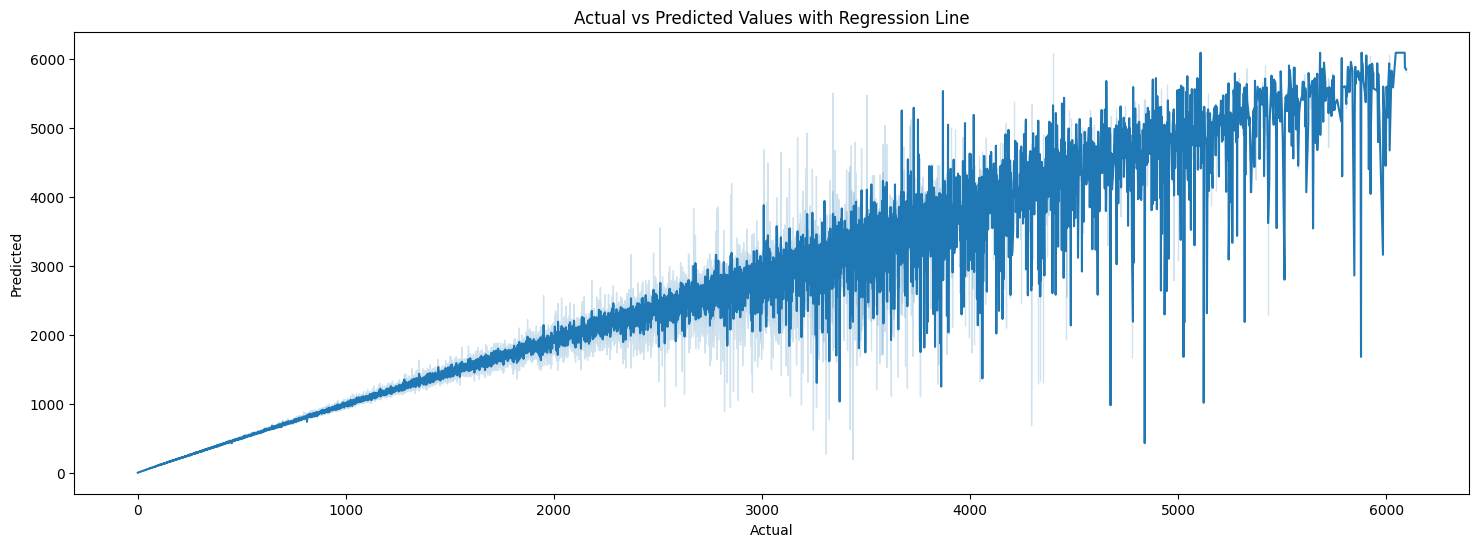

In [30]:
KNN(Dijon_Apple)

Mean Squared Error: 318150.28216522833
Mean Absolute Error: 183.79962917880988
R2 Score: 0.9207547106883709


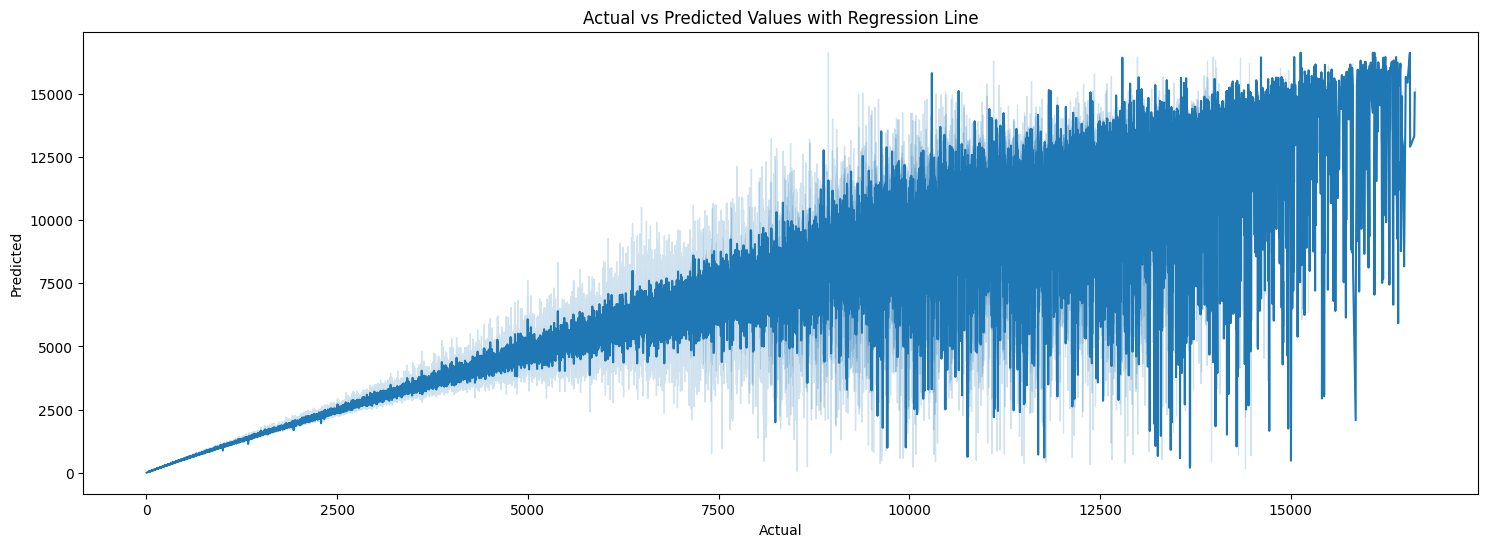

In [31]:
KNN(Toulouse_Apple)

Clustering


In [46]:
def elbowmeathod(x,city):
    inertia = [] 
    mapping = {} 
    for k in range(1,10): 

        kmeanModel = KMeans(n_clusters=k).fit(x) 
        inertia.append(kmeanModel.inertia_) 
        mapping[k] = kmeanModel.inertia_ 
    plt.plot(range(1,10), inertia, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method of '+city) 
    plt.show() 


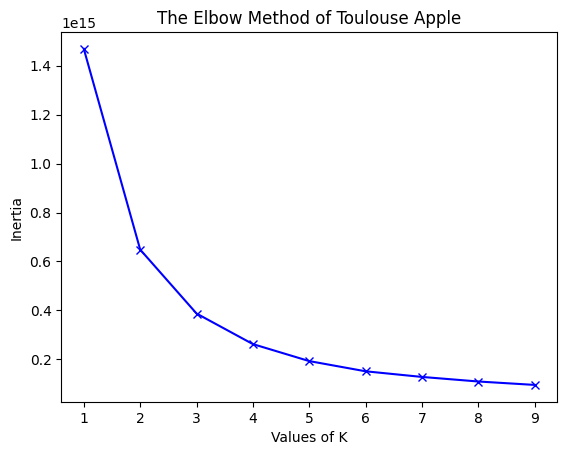

In [47]:
elbowmeathod(Toulouse_Apple,"Toulouse Apple")

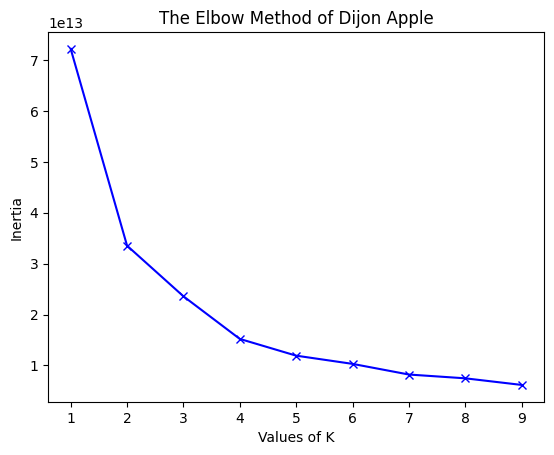

In [48]:
elbowmeathod(Dijon_Apple,"Dijon Apple")

In [49]:
def kmeans(n,df):
    kmeans = KMeans(n_clusters=n, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df)
    melted_df = df.melt(id_vars=['Date', 'tile_id', 'Cluster','Total usages'], var_name='Time', value_name='Usage')
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Time', y='Usage', hue='Cluster', data=melted_df, palette='tab10')
    plt.title('Data Usage Clusters Over Time')
    plt.xlabel('Time')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='Time', y='Usage', hue='Cluster', data=melted_df, palette='tab10', s=50)
    plt.title('Cluster Visualization Over Time')
    plt.xlabel('Time')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()


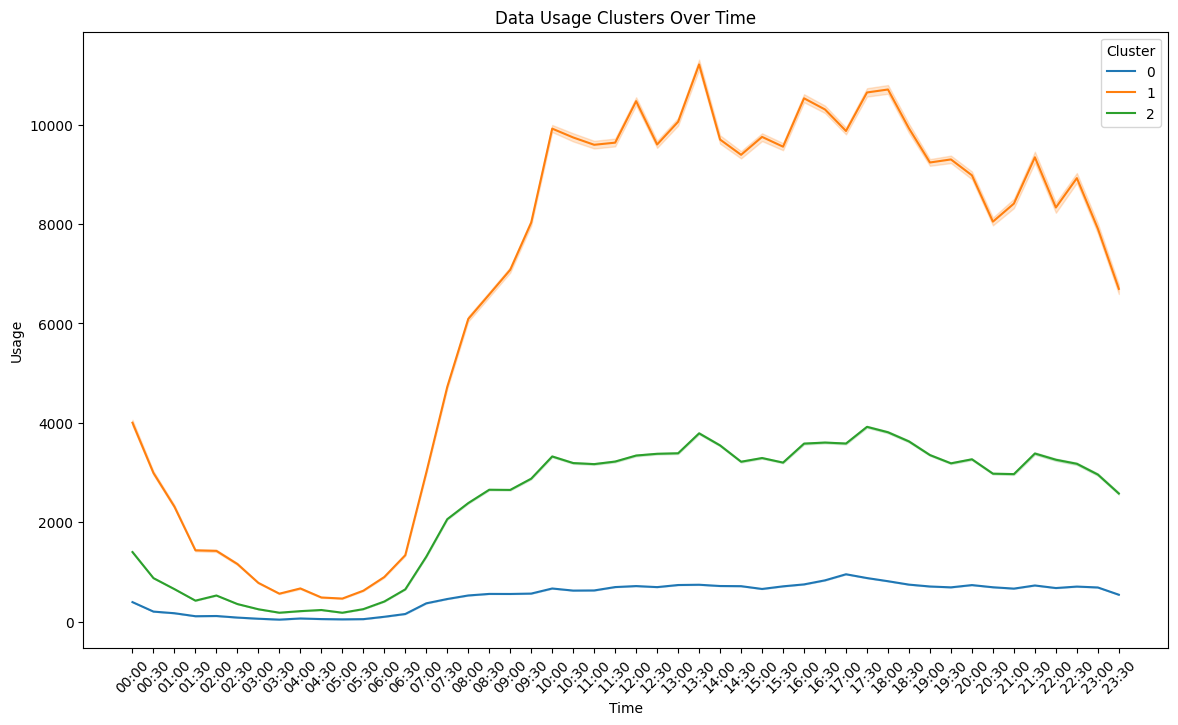

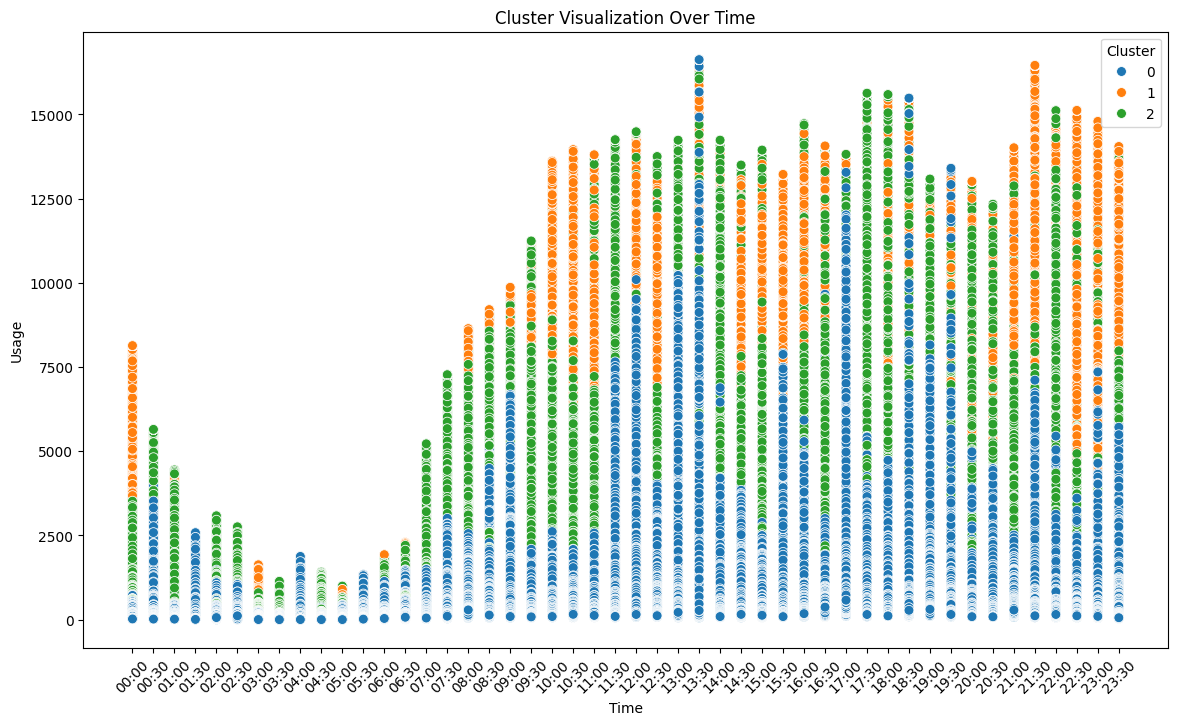

In [50]:
kmeans(3,Toulouse_Apple)

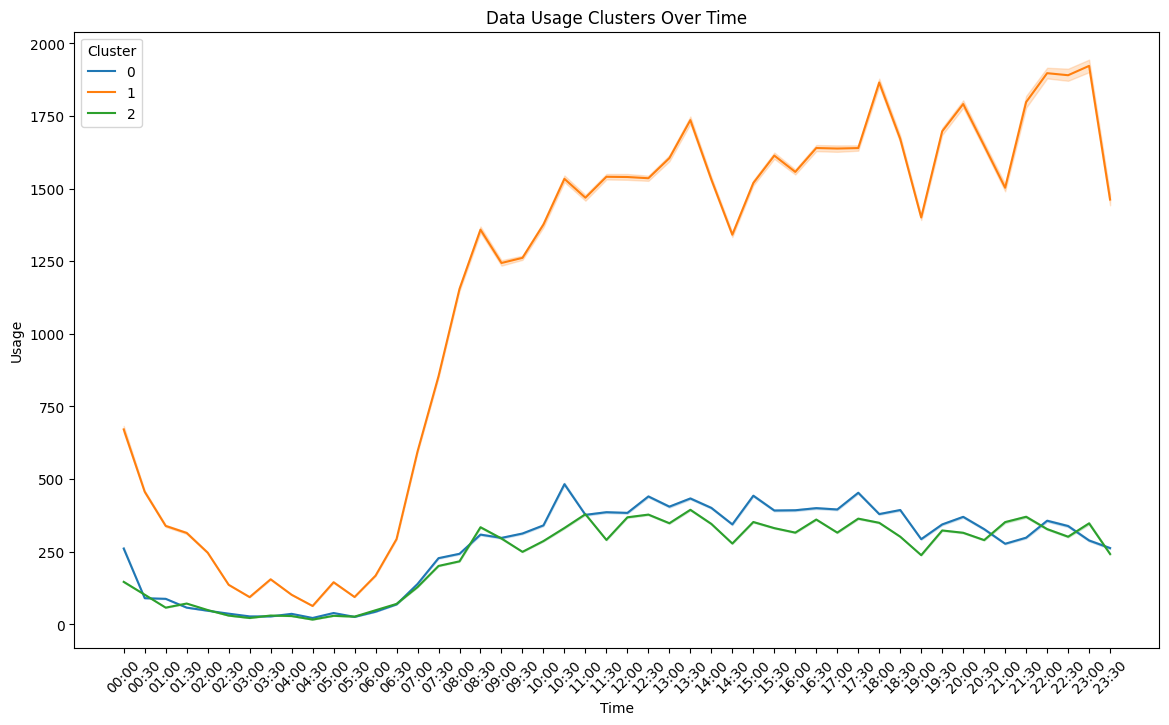

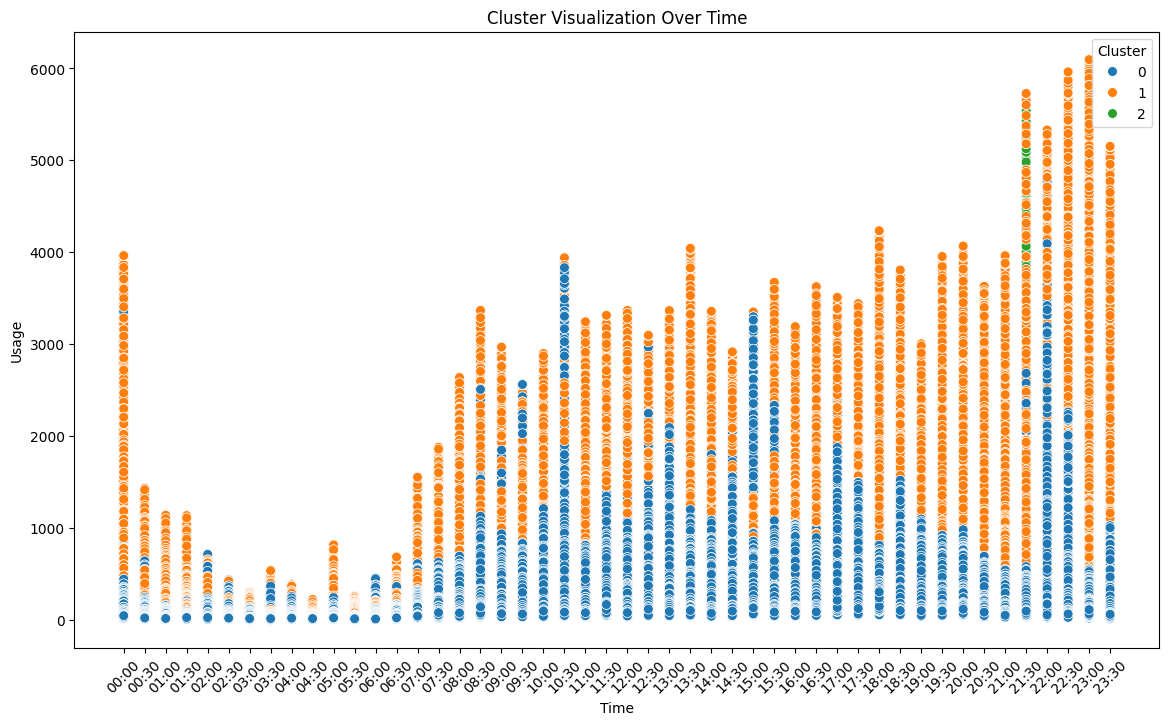

In [52]:
kmeans(3,Dijon_Apple)

In [ ]:
Toulouse_Apple['Date'] = pd.to_datetime(Toulouse_Apple['Date'], format='%Y%m%d')
Dijon_Apple['Date'] = pd.to_datetime(Dijon_Apple['Date'], format='%Y%m%d')

In [ ]:
df1=Toulouse_Apple[Toulouse_Apple['Cluster']==0]
df2=Toulouse_Apple[Toulouse_Apple['Cluster']==1]
df3=Toulouse_Apple[Toulouse_Apple['Cluster']==2]
df4=Toulouse_Apple[Toulouse_Apple['Cluster']==3]


In [ ]:
df11=Dijon_Apple[Dijon_Apple['Cluster']==0]
df22=Dijon_Apple[Dijon_Apple['Cluster']==1]
df33=Dijon_Apple[Dijon_Apple['Cluster']==2]

EDA

C:\Users\marya\AppData\Local\Temp\ipykernel_17040\261228315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Date'] = pd.to_datetime(df11['Date'], format='%Y%m%d')
C:\Users\marya\AppData\Local\Temp\ipykernel_17040\261228315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['Date'] = pd.to_datetime(df22['Date'], format='%Y%m%d')
C:\Users\marya\AppData\Local\Temp\ipykernel_17040\261228315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

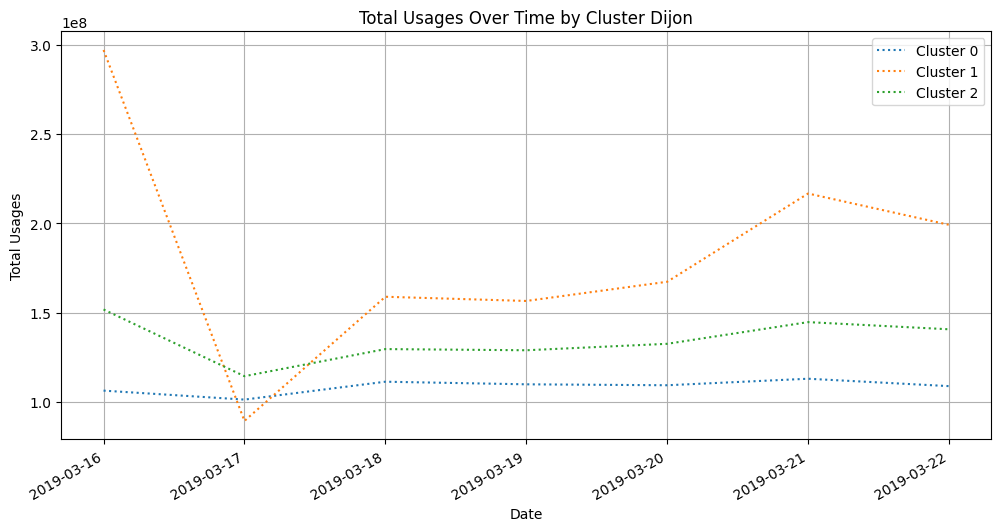

In [ ]:

df11['Date'] = pd.to_datetime(df11['Date'], format='%Y%m%d')
df22['Date'] = pd.to_datetime(df22['Date'], format='%Y%m%d')
df33['Date'] = pd.to_datetime(df33['Date'], format='%Y%m%d')
df11 = df11.groupby('Date')['Total usages'].sum().reset_index()
df22 = df22.groupby('Date')['Total usages'].sum().reset_index()
df33 = df33.groupby('Date')['Total usages'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df11['Date'], df11['Total usages'], label='Cluster 0', color='tab:blue', linestyle='dotted')
plt.plot(df22['Date'], df22['Total usages'], label='Cluster 1', color='tab:orange', linestyle='dotted')
plt.plot(df33['Date'], df33['Total usages'], label='Cluster 2', color='tab:green', linestyle='dotted')


plt.xlabel('Date')
plt.ylabel('Total Usages')
plt.title('Total Usages Over Time by Cluster Dijon')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gcf().autofmt_xdate()  

plt.show()

C:\Users\marya\AppData\Local\Temp\ipykernel_17040\59038199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d')
C:\Users\marya\AppData\Local\Temp\ipykernel_17040\59038199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m%d')
C:\Users\marya\AppData\Local\Temp\ipykernel_17040\59038199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

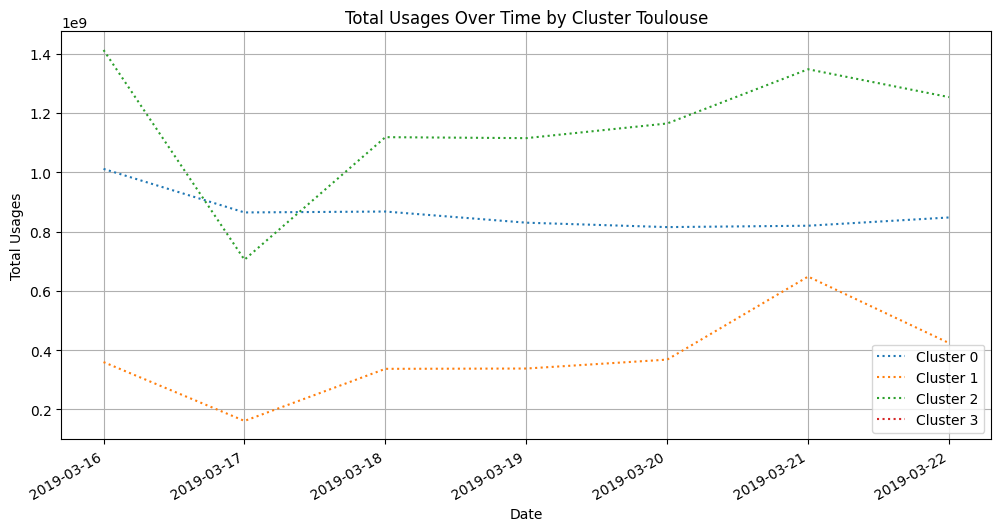

In [ ]:


df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d')
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m%d')
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y%m%d')
df4['Date'] = pd.to_datetime(df4['Date'], format='%Y%m%d')
df1 = df1.groupby('Date')['Total usages'].sum().reset_index()
df2 = df2.groupby('Date')['Total usages'].sum().reset_index()
df3 = df3.groupby('Date')['Total usages'].sum().reset_index()
df4 = df4.groupby('Date')['Total usages'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Total usages'], label='Cluster 0', color='tab:blue', linestyle='dotted')
plt.plot(df2['Date'], df2['Total usages'], label='Cluster 1', color='tab:orange', linestyle='dotted')
plt.plot(df3['Date'], df3['Total usages'], label='Cluster 2', color='tab:green', linestyle='dotted')
plt.plot(df4['Date'], df4['Total usages'], label='Cluster 3', color='tab:red', linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Total Usages')
plt.title('Total Usages Over Time by Cluster Toulouse')
plt.legend()
plt.grid(True)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gcf().autofmt_xdate()  

plt.show()

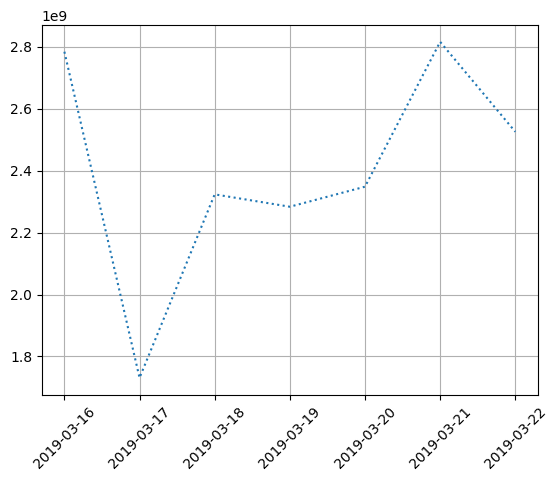

In [ ]:
def datetimeplot(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    daily_usages = df.groupby('Date')['Total usages'].sum().reset_index()
    plt.plot(daily_usages['Date'],daily_usages['Total usages'], linestyle = 'dotted')
    plt.xticks(rotation=45)
    plt.grid(True)
datetimeplot(Toulouse_Apple)